In [ ]:
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

In [2]:
def organize_path(file_):
  return '/content/vinbigdata/train/' + file_ + '.jpg'

In [ ]:
!cp /content/drive/MyDrive/datasets-projeto/vinbigdata-dataset.zip /content/
!unzip /content/vinbigdata-dataset.zip

In [20]:
vinbigdata_df = pd.read_csv('/content/vinbigdata/train.csv')
vinbigdata_df = vinbigdata_df.drop(['class_id', 'rad_id', 'x_min', 'y_min', 
                                    'x_max', 'y_max', 'width', 'height'], 
                                   axis = 1)

vinbigdata_df.rename(columns = {'image_id': 'Path'}, inplace = True)
path = list(vinbigdata_df['Path'])
path = list(map(organize_path, path))
vinbigdata_df['Path'] = path
vinbigdata_df['Dataset'] = ['VinBigData'] * len(vinbigdata_df)
vinbigdata_df['Sex'] = ['No Inf'] * len(vinbigdata_df)
vinbigdata_df['Label Type'] = ['Multiclass'] * len(vinbigdata_df)

In [ ]:
classes = ['No finding', 'Pneumothorax', 'Atelectasis', 'Nodule/Mass', 
           'Lung Opacity', 'Pleural effusion']

dict_abnormalities = dict()
for classe in classes:
  sub = vinbigdata_df[vinbigdata_df['class_name'] == classe]
  dict_abnormalities[classe] = sub

for keys, items in dict_abnormalities.items():
  dict_abnormalities[keys][keys] = [1] * len(items)
  columns_others = list(dict_abnormalities.keys())
  columns_others.remove(keys)
  zeros = np.zeros((len(items), 5))
  others_df = pd.DataFrame(data = zeros, columns = columns_others)
  dict_abnormalities[keys] = dict_abnormalities[keys].join(others_df)
  dict_abnormalities[keys] = dict_abnormalities[keys].fillna(0)
  columns = np.concatenate((['Dataset', 'Path', 'Sex', 'class_name', 
                             'Label Type'], list(dict_abnormalities.keys())))
  dict_abnormalities[keys] = dict_abnormalities[keys][columns]

In [22]:
for index, sub in enumerate(dict_abnormalities.keys()):
  if index == 0:
    vinbigdata_df = dict_abnormalities[sub]
  elif index != len(dict_abnormalities):
    vinbigdata_df = pd.concat((vinbigdata_df, dict_abnormalities[sub]))

vinbigdata_df = vinbigdata_df.drop(['class_name'], axis = 1)

Text(0.5, 1.0, 'Quantidade Total de Imagens: Base de Dados VinBigData - Multiclasse')

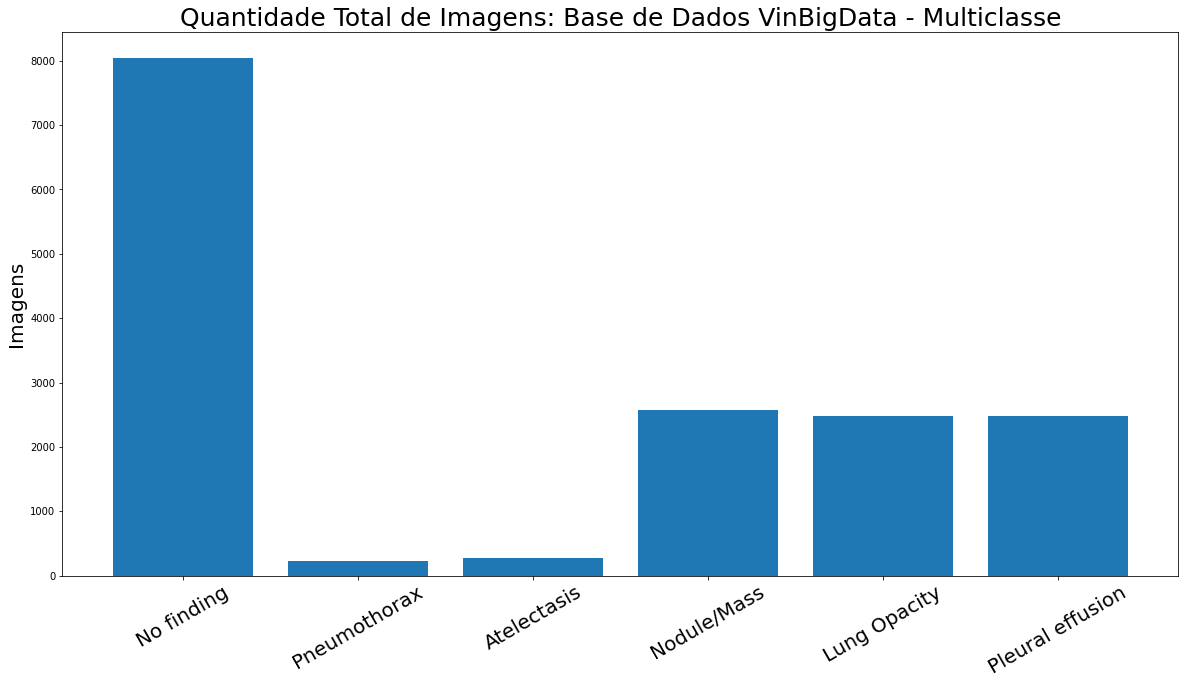

In [23]:
count_findings = list()
for finding in classes:
  count = dict(vinbigdata_df[finding].value_counts())[1.0]
  count_findings.append(count)

plt.figure(figsize = (20, 10))
plt.bar(classes, count_findings)
plt.xticks(rotation = 30, size = 20)
plt.ylabel('Imagens', size = 20)
plt.title('Quantidade Total de Imagens: Base de Dados VinBigData - Multiclasse', 
          size = 25)

In [24]:
columns = np.concatenate((['Dataset', 'Path', 'Sex', 'Label Type'], 
                          list(dict_abnormalities.keys())))
vinbigdata_df.to_csv(path_or_buf = 'vinbigdata_df.csv', columns = columns)